# Welcome to Energy saving system in the classroom

Have you ever wondered how energy saving in classrooms can be automated more easily? One simple way  of doing it is to write a program to detect if there are people inside a classroom and depending on whether they are present, the code could send a signal to the airconditioner to turn it on. Since the process of turning on the airconditioner is a hardware problem, we will be tackling only the problem of detecting people in a classroom. 

In order to detect the people from the  camera we will be using the 'person-detection-retail-0013' pre-trained models from the OpenVINO model zoo. You can find out more about it here ->https://docs.openvinotoolkit.org/2019_R1/usergroup1.html


In [1]:
import cv2#importing all required libraries
import numpy as np
from utils.opv import OpvModel  
import matplotlib.pyplot as plt

## Task: Load the pretrained model 

In [2]:
mymodel2 = OpvModel("person-detection-retail-0013",device="CPU", fp="FP16", ncs=1)

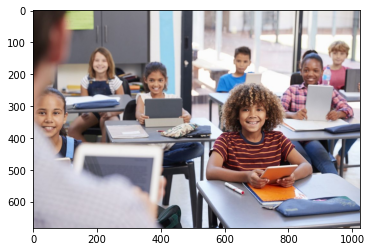

In [3]:
image = cv2.imread("sec.jpg")
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.show()

In [4]:
image = cv2.resize(image,(1200,710)) #Resizing original image as it is too large
predictions = mymodel2.Predict(image)

## Task: Draw Bounding Box around the body

We create a function to draw a bounding box around the body image that has been detected by person-detection-action-recognition-0005.

In [5]:
from google.colab.patches import cv2_imshow

def DrawBoundingBoxes(predictions, image):
    canvas = image.copy()                             # copy instead of modifying the original image
    predictions_1 = predictions[0][0]                 # subset dataframe
    confidence = predictions_1[:,2]                   # getting conf value [image_id, label, conf, x_min, y_min, x_max, y_max]
    topresults = predictions_1[(confidence>0)]     # choosing only predictions with conf value bigger than treshold
    (h,w) = canvas.shape[:2]                        # setting the variable h and w according to image height
    
    #
    for detection in topresults:
        box = detection[3:7] * np.array([w, h, w, h]) # determine box location
        (xmin, ymin, xmax, ymax) = box.astype("int") # assign box location value to xmin, ymin, xmax, ymax

        cv2.rectangle(canvas, (xmin, ymin), (xmax, ymax), (0, 0, 255), 4)  # make a rectangle
        cv2.putText(canvas, str(round(detection[2]*100,1))+"%", (xmin, ymin), # include text
            cv2.FONT_HERSHEY_SIMPLEX, 0.6, (255, 0,0), 2)
    cv2.putText(canvas, str(len(topresults))+" Persons detected", (50,50), # include text
            cv2.FONT_HERSHEY_SIMPLEX, 0.6, (255, 0,0), 2)
    return canvas

cv2_imshow(DrawBoundingBoxes(predictions,image))


## Task: Create a threshold.

If there are more than 3 people in the class then print out a statement "Turning on Aircon".

In [8]:
def DrawBoundingBoxes(predictions, image, conf=0.1):
    canvas = image.copy()                             # copy instead of modifying the original image
    predictions = predictions[0][0]
    confidence = predictions[:,2]
    topresults = predictions[(confidence>conf)]
    if len(topresults) > 3:
        
     (h,w) = canvas.shape[:2]
     for detection in topresults:
        box = detection[3:7] * np.array([w, h, w, h])
        (xmin, ymin, xmax, ymax) = box.astype("int")

        cv2.rectangle(canvas, (xmin, ymin), (xmax, ymax), (0, 0, 255), 4)
        cv2.putText(canvas, str(round(detection[2]*100,1))+"%", (xmin, ymin),
            cv2.FONT_HERSHEY_SIMPLEX, 0.6, (255, 0,0), 2)
        cv2.putText(canvas,"Turn on A/C", (50,50),
            cv2.FONT_HERSHEY_SIMPLEX, 0.6, (255, 0,0), 2)

    return canvas

cv2_imshow(DrawBoundingBoxes(predictions,image,conf=0.1))
